In [1]:
import pandas as pd

from sandbox import (
    filter_patient_data,
    plot_patient_expenses_by,
)

pd.set_option("display.max_rows", None)
pd.options.display.float_format = "{:,.2f}".format

# Basics

In [2]:
df = pd.read_csv('data/DATENSATZ_UEAI.csv', delimiter=',')
df.head(10)

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
0,1,2018,720.08,ICD37,ATC-66,663+OPS,1977
1,1,2018,408.20,ICD97,ATC-00,003+OPS,1977
2,1,2018,85.79,ICD49,ATC-50,503+OPS,1977
3,1,2018,132.53,NaN,ATC-13,NaN,1977
4,2,2018,32.47,ICD04,ATC-32,323+OPS,1939
5,2,2018,546.31,ICD16,ATC-26,263+OPS,1939
6,2,2018,162.32,ICD28,ATC-00,003+OPS,1939
7,2,2018,160.87,NaN,ATC-25,253+OPS,1939
8,2,2019,501.41,ICD10,ATC-21,213+OPS,1939
9,2,2019,236.77,ICD08,ATC-46,463+OPS,1939



- Versnr ist der Identifyer
- Das Dataset geht über 4 Jahre
- Die Spalten Diagnosen, Medikament und Eingriff sind Pseudocodes und weisen Lücken auf
- Die Spalten Medikament und Eingriff haben vermutlich Korrelationen
- Die Versicherten scheinen gehobenen Alters zu sein.

### Cleaning

In [3]:
# Entfernen von Sonderzeichen und Buchstaben aus den Spalten Diagnose, Medikament und Eingriff
df['Diagnose'] = df['Diagnose'].str.replace(r'[^0-9]', '', regex=True).fillna("Missing")
df['Medikament'] = df['Medikament'].str.replace(r'[^0-9]', '', regex=True).fillna("Missing")
df['Eingriff'] = df['Eingriff'].str.replace(r'[^0-9]', '', regex=True).fillna("Missing")
df.head()

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
0,1,2018,720.08,37,66,663,1977
1,1,2018,408.20,97,00,003,1977
2,1,2018,85.79,49,50,503,1977
3,1,2018,132.53,Missing,13,Missing,1977
4,2,2018,32.47,04,32,323,1939


# Fallgeschichten
## Frau Schmidt - Versnr 33

In [4]:
df.head()

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
0,1,2018,720.08,37,66,663,1977
1,1,2018,408.20,97,00,003,1977
2,1,2018,85.79,49,50,503,1977
3,1,2018,132.53,Missing,13,Missing,1977
4,2,2018,32.47,04,32,323,1939


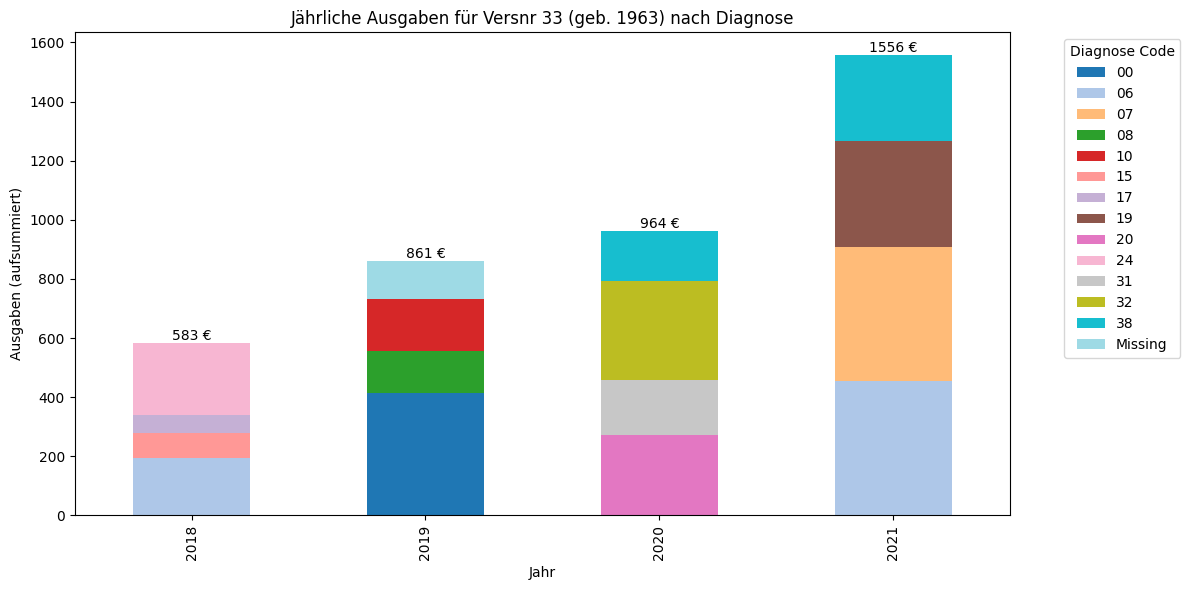

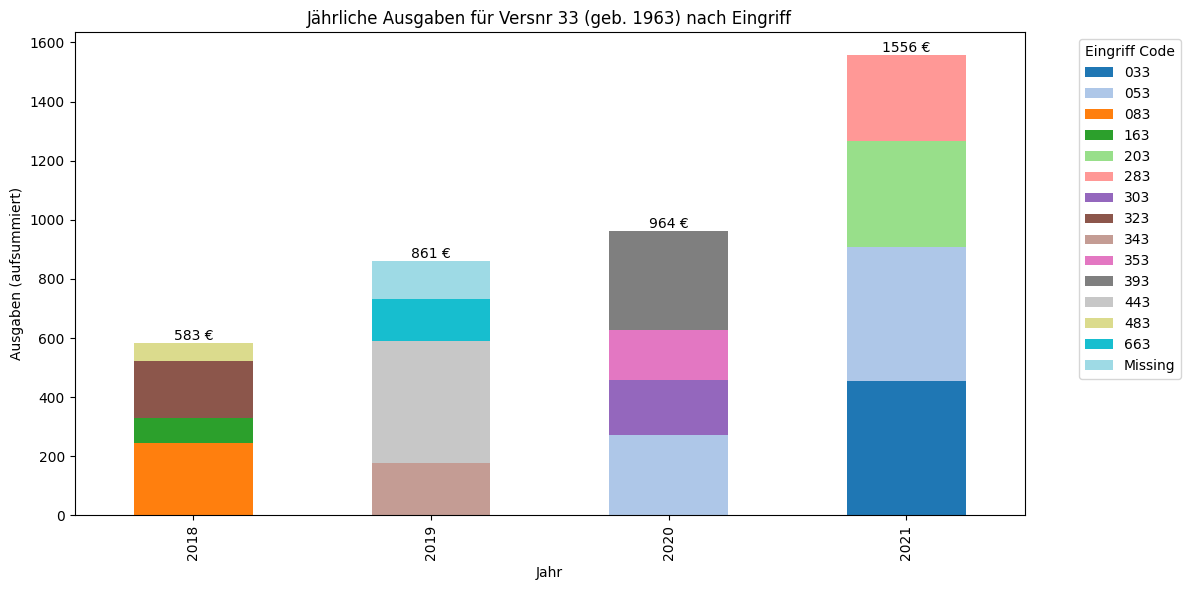

In [5]:
plot_patient_expenses_by(df, 33, 'Diagnose')
plot_patient_expenses_by(df, 33, 'Eingriff')

In [6]:
frau_schmidt = filter_patient_data(df, 33)
frau_schmidt

,index,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr,Jahresausgaben,Kumulative_Ausgaben
0,460,33,2018,244.60,24,08,083,1963,582.96,244.60
1,461,33,2018,196.03,06,32,323,1963,582.96,440.63
2,462,33,2018,83.49,15,16,163,1963,582.96,524.12
3,463,33,2018,58.84,17,48,483,1963,582.96,582.96
4,464,33,2019,141.99,08,66,663,1963,861.14,141.99
5,465,33,2019,176.36,10,34,343,1963,861.14,318.35
6,466,33,2019,415.44,00,44,443,1963,861.14,733.79
7,467,33,2019,127.35,Missing,Missing,Missing,1963,861.14,861.14
8,468,33,2020,168.92,38,35,353,1963,963.60,168.92
9,469,33,2020,336.37,32,39,393,1963,963.60,505.29


Die Geschichte von Frau Schmidt, geboren 1963 (Versnr 33), zeigt den typischen Verlauf einer älteren Patientin:
- 2018: Mit 55 Jahren beginnt Frau Schmidt regelmäßige Arztbesuche. Sie hat vier verschiedene Diagnosen und nimmt verschiedene Medikamente ein. Ihre Gesundheitsausgaben belaufen sich auf über 582 € in diesem Jahr.
- 2019: Ihr Gesundheitszustand verschlechtert sich leicht. Neue Diagnosen kommen hinzu, und die Ausgaben steigen auf über 860 €. Sie benötigt nun andere medizinische Eingriffe.
- 2020: Mit 57 Jahren verschlechtert sich ihr Zustand langsam weiter. Zumindest steigen die Kosten auf fast 1.000 € an. 
- 2021: Auch im folgejahr steigen die Gesundheitskosten wieder an. Mit über 1500 € Ausgaben zeigt sich, dass das Altern seine Herausforderungen mit sich bringt. Neue Diagnosen und Medikamente deuten auf sich verändernde Gesundheitsbedürfnisse hin.

Diese Geschichte verdeutlicht, wie die Gesundheitsausgaben und medizinischen Bedürfnisse im Alter zunehmen und schwanken können, was typisch für viele Patienten in diesem Dataset ist.

## Herr Meyer - Versnr 9970

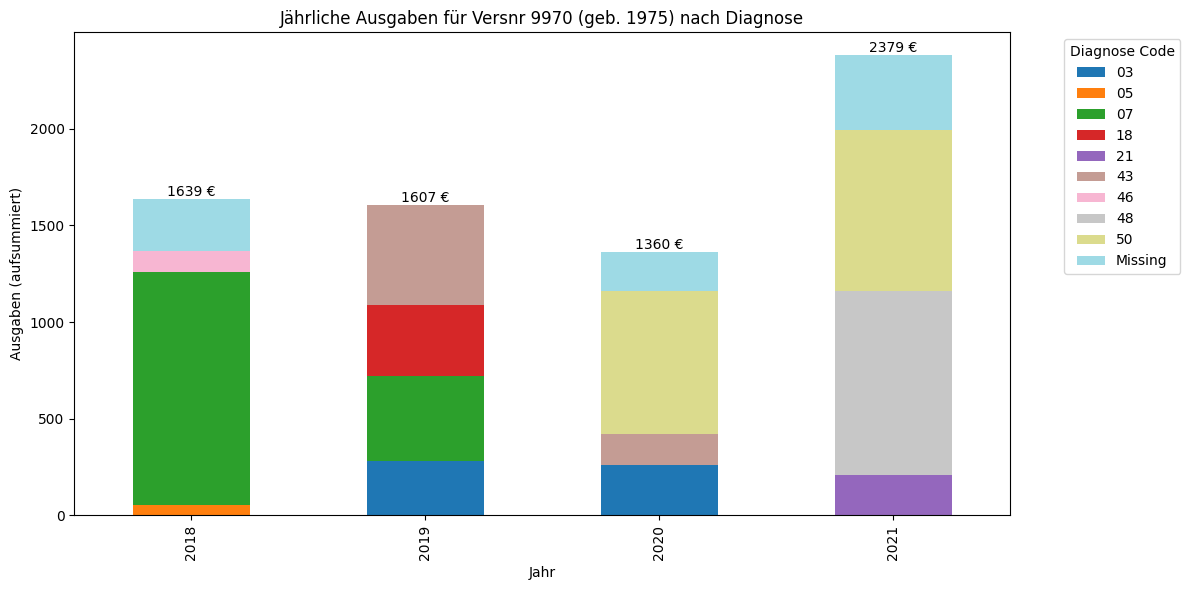

In [7]:
plot_patient_expenses_by(df, 9970, 'Diagnose')

In [8]:
herr_meyer = filter_patient_data(df, 9970)
herr_meyer

,index,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr,Jahresausgaben,Kumulative_Ausgaben
0,144592,9970,2018,"1,202.60",07,00,003,1975,"1,638.66","1,202.60"
1,144593,9970,2018,54.97,05,10,103,1975,"1,638.66","1,257.57"
2,144594,9970,2018,112.27,46,53,533,1975,"1,638.66","1,369.84"
3,144595,9970,2018,268.82,Missing,00,Missing,1975,"1,638.66","1,638.66"
4,144596,9970,2019,283.64,03,33,333,1975,"1,606.82",283.64
5,144597,9970,2019,438.67,07,10,103,1975,"1,606.82",722.31
6,144598,9970,2019,516.39,43,56,563,1975,"1,606.82","1,238.70"
7,144599,9970,2019,368.12,18,23,Missing,1975,"1,606.82","1,606.82"
8,144600,9970,2020,740.85,50,11,113,1975,"1,359.69",740.85
9,144601,9970,2020,259.82,03,10,103,1975,"1,359.69","1,000.67"


Die Geschichte von Herr Meyer, geboren 1975 (Versnr 9970), vielleicht etwas chronishches?
- 2018: Mit 43 Jahren beginnt Herr Meyers Kampf gegen ICD07. 
- 2019: Auch 2019 leidet er noch. Hinzu kommt eine ICD03 der Eingriff und die Medikation ist zwar recht günstig (283.64 €),
- 2020: jedoch kämpft er auch 2020 noch mit der Krankheit. In deisem Jahr bricht auch ICD50 bei Herr Meyer aus.
- 2021: Die Kosten allein für die Behandlung von ICD50 belaufen sich auf 832 €. Hinzu kommen weitere Diagnosen. Seine Gesamtsituation verschlechter sich und damit die der Kasse (Kosten 2378.90 €).

Die Daten zeigen einen Patienten der über mehrer Jahr mit denselben Diagnosen kämpft. Dabei variieren die Kosten, im Trend werden sie aber steigen.

## Die älteste Versicherte Versnr - 2202 Walburga Bani 99 Jahre (2018)

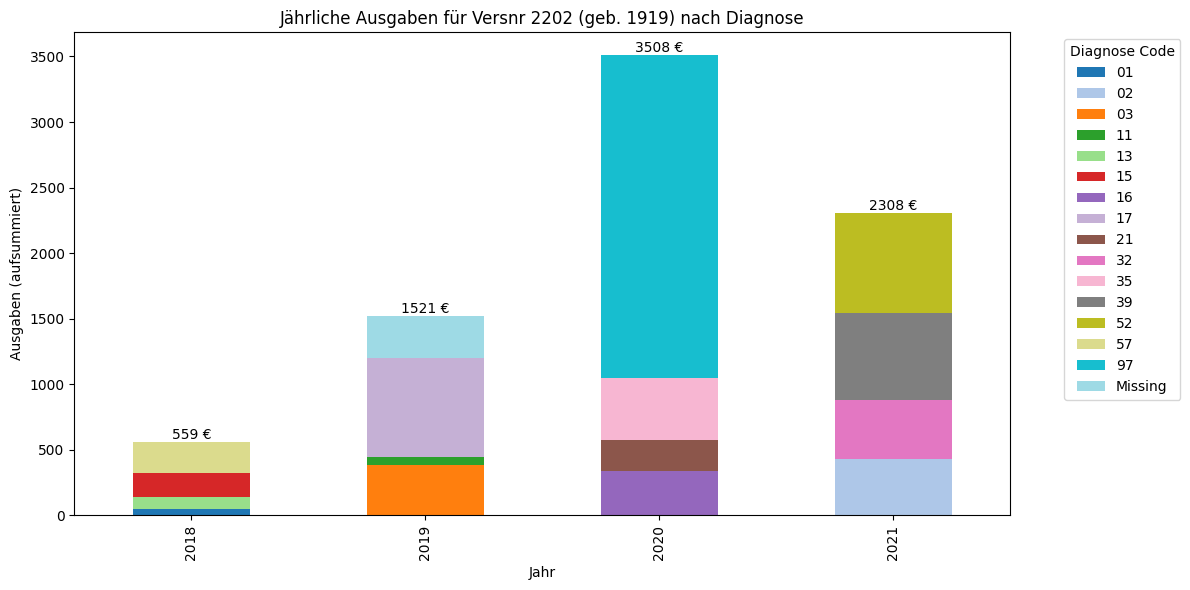

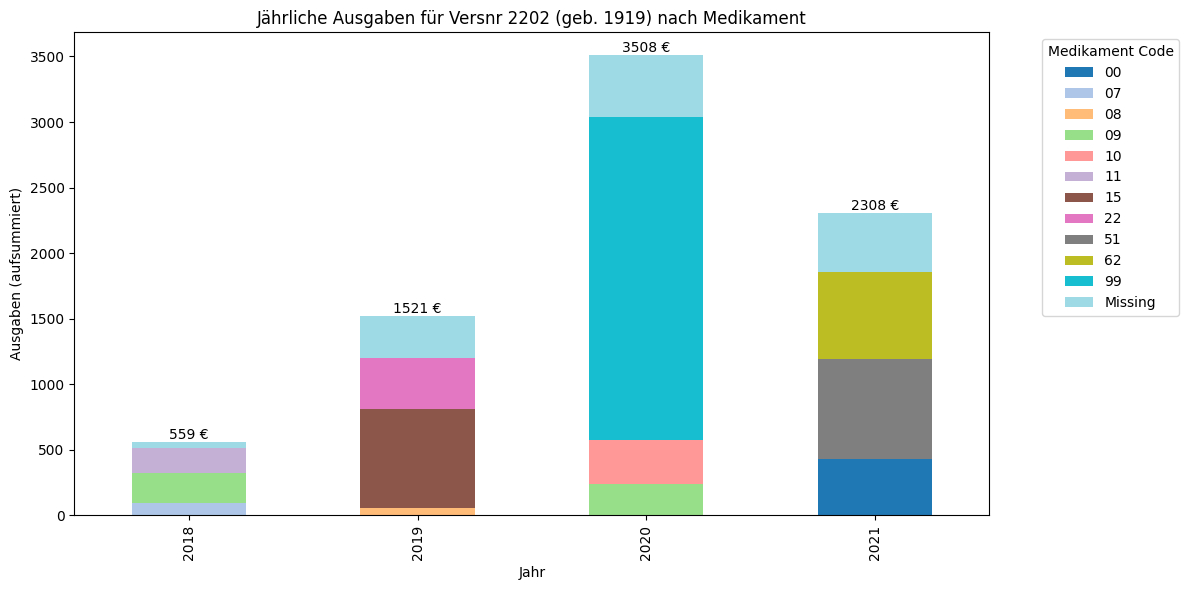

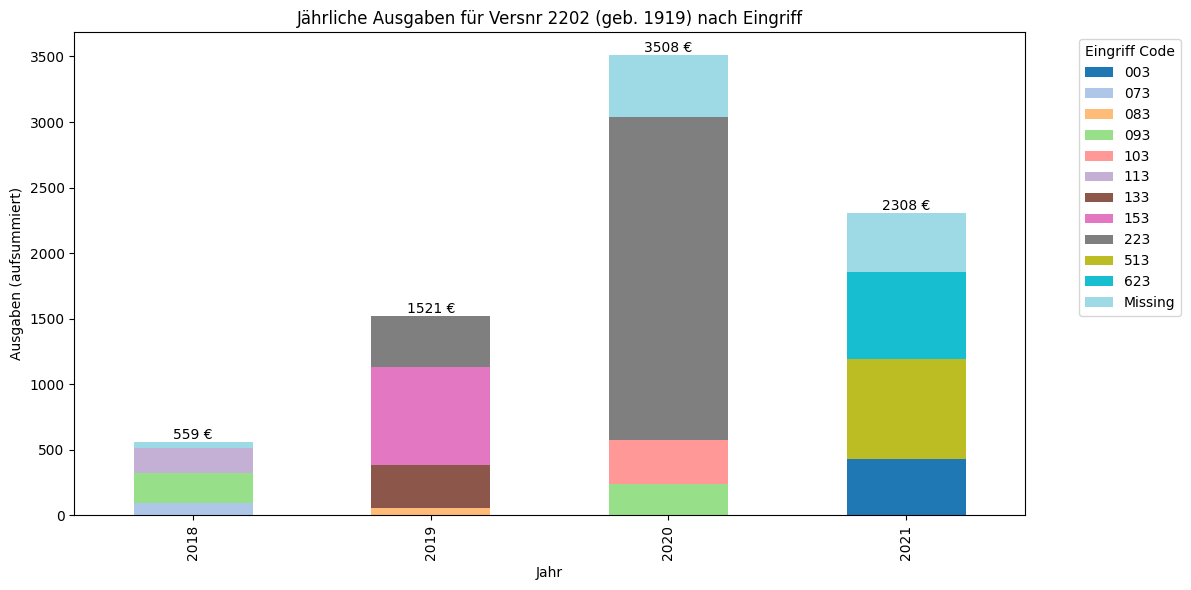

Die älteste Versicherte wurde im Jahr 1919 geboren. Versnr: 2202


In [9]:
oldest_year = df["Gebjahr"].min()
oldest_person = df[df["Gebjahr"] == oldest_year]

plot_patient_expenses_by(df, 2202, "Diagnose")
plot_patient_expenses_by(df, 2202, "Medikament")
plot_patient_expenses_by(df, 2202, "Eingriff")
print(f"Die älteste Versicherte wurde im Jahr {oldest_year} geboren. Versnr: {oldest_person['Versnr'].values[0]}")

## Jüngste - Versnr 4146 Sophia Gümüsai

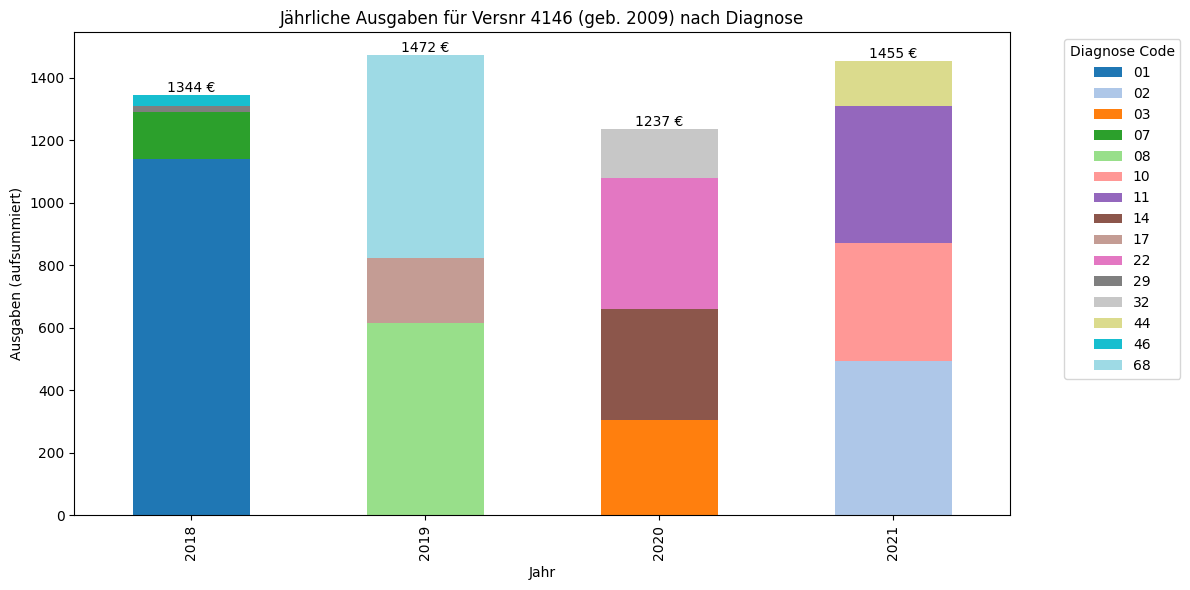

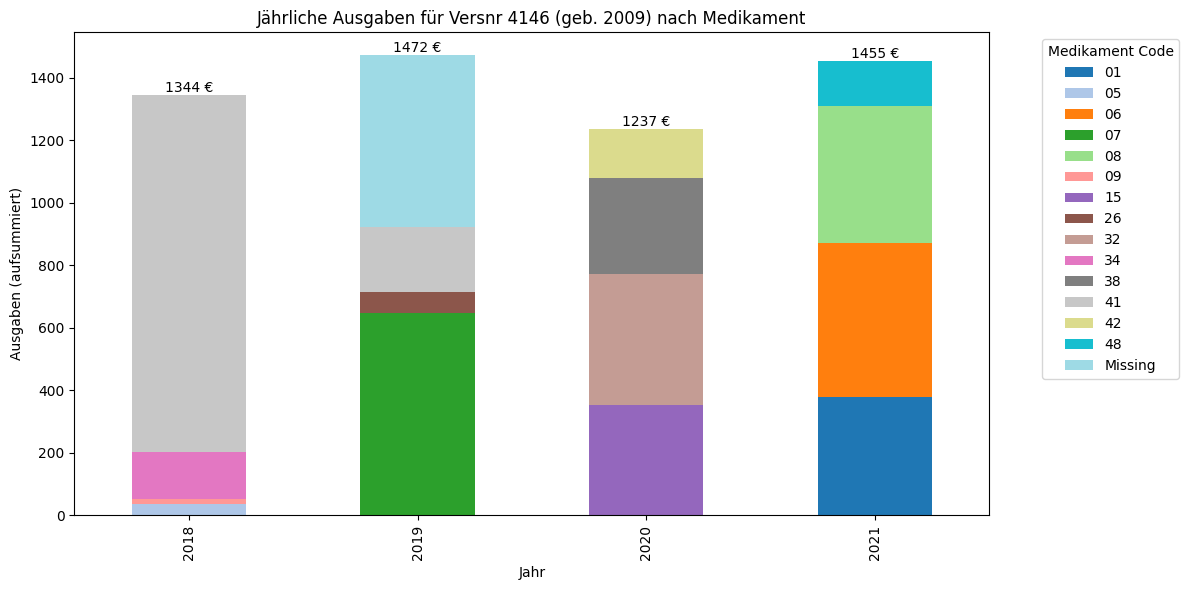

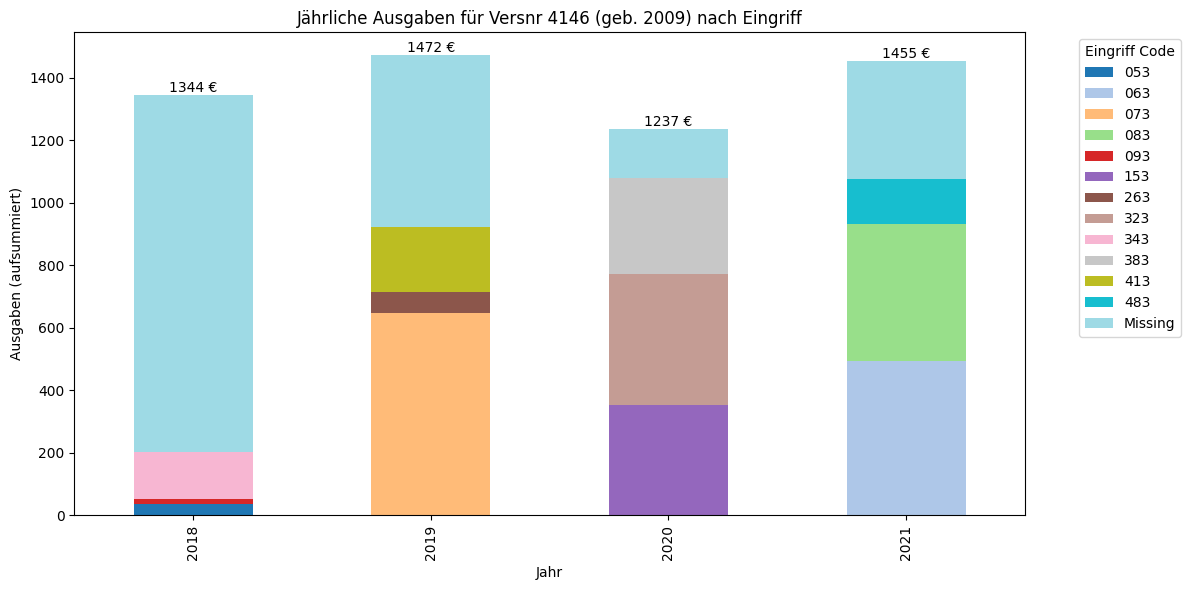

Der jüngste Versicherte wurde im Jahr 2009 geboren. Versnr: 4146


In [10]:
youngest_year = df["Gebjahr"].max()
youngest_person = df[df["Gebjahr"] == youngest_year]

plot_patient_expenses_by(df, 4146, "Diagnose")
plot_patient_expenses_by(df, 4146, "Medikament")
plot_patient_expenses_by(df, 4146, "Eingriff")
print(f"Der jüngste Versicherte wurde im Jahr {youngest_year} geboren. Versnr: {youngest_person['Versnr'].values[0]}")

In [11]:
youngest_person = filter_patient_data(df, 4146)
youngest_person.sort_values(by="Ausgaben", ascending=False)

,index,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr,Jahresausgaben,Kumulative_Ausgaben
3,60271,4146,2018,"1,140.68",01,41,Missing,2009,"1,344.22","1,344.22"
5,60273,4146,2019,647.79,68,07,073,2009,"1,472.43",856.11
7,60275,4146,2019,547.85,08,Missing,Missing,2009,"1,472.43","1,472.43"
12,60280,4146,2021,495.11,02,06,063,2009,"1,455.48",495.11
14,60282,4146,2021,438.25,11,08,083,2009,"1,455.48","1,077.30"
9,60277,4146,2020,418.52,22,32,323,2009,"1,237.04",772.64
15,60283,4146,2021,378.18,10,01,Missing,2009,"1,455.48","1,455.48"
8,60276,4146,2020,354.12,14,15,153,2009,"1,237.04",354.12
10,60278,4146,2020,307.07,03,38,383,2009,"1,237.04","1,079.71"
4,60272,4146,2019,208.32,17,41,413,2009,"1,472.43",208.32


Beobachtung:
- Kosten konstant sehr hoch und das schon mit 9 Jahren beginnend.
- Sieht komisch aus, da das Medikament ATC-41 massiv weniger kostete. Vielleicht wurde die Dosis verändert. Für Eingriffe bei dieser Pateienten fehlen einige Informationen? Wird sie nur medikamentös behandelt?
- Index 60275 keine Medikation und kein Eingriff? Wie kann das sein?